Final Project CMSC6950 Fall 2015


Mona Hejazi


 201996350
 

## **Introduction**
This project aims to analyze a dataset containing one year of weather records for Tehran, focusing on identifying extreme values in temperature and precipitation.

In this analysis, I worked with a weather dataset containing daily weather records for Tehran. The dataset includes several meteorological variables such as average temperature (`tavg`), minimum and maximum temperature (`tmin`, `tmax`), precipitation (`prcp`), snow, wind direction (`wdir`), wind speed (`wspd`), and atmospheric pressure (`pres`). My primary goal was to examine the dataset for missing values, compute summary statistics, and identify extreme or outlier values in key weather parameters using statistical methods.

#### **Dataset Overview**:
The dataset consists of 366 entries (one per day), covering a full year of daily weather data. There are 11 columns in total:

- `date`: Date of the weather record
- `tavg`: Average temperature (°C)
- `tmin`: Minimum temperature (°C)
- `tmax`: Maximum temperature (°C)
- `prcp`: Precipitation (mm)
- `snow`: Snowfall (cm) — with limited data
- `wdir`: Wind direction (degrees)
- `wspd`: Wind speed (m/s)
- `wpgt`: Wind gust (m/s) — with missing data
- `pres`: Atmospheric pressure (hPa)
- `tsun`: Sunshine duration (hours) — missing data

#### **Objectives**
1.	Analyze daily average, minimum, maximum temperatures, and precipitation over a year.
2.	Identify and visualize extreme temperature and precipitation values using statistical methods.
3.	Understand the implications of extreme weather events in Tehran.

#### **Data Overview**

The dataset includes daily records of the following parameters from 1 October 2023 to 30 September 2024:  Average Temperature (tag), Minimum Temperature (min), Maximum Temperature (tmax), and Precipitation (prep). 

#### **Source** :
 https://meteostat.net/en/place/ir/tehran?s=40754&t=2023-10-01/2024-09-30



         date  tavg  tmin  tmax  prcp  snow  wdir  wspd  wpgt    pres  tsun
0  2023-10-01  23.1  18.7  27.3   0.0   NaN    63   9.3   NaN  1013.6   NaN
1  2023-10-02  23.4  18.5  27.4   0.0   NaN   306  13.6   NaN  1013.1   NaN
2  2023-10-03  23.7  18.8  28.1   0.0   NaN   258  19.0   NaN  1014.8   NaN
3  2023-10-04  21.8  18.9  27.4   0.0   NaN   271  21.0   NaN  1017.6   NaN
4  2023-10-05  19.7  16.0  25.3   0.0   NaN   272  32.0   NaN  1017.9   NaN
Index(['date', 'tavg', 'tmin', 'tmax', 'prcp', 'snow', 'wdir', 'wspd', 'wpgt',
       'pres', 'tsun'],
      dtype='object')


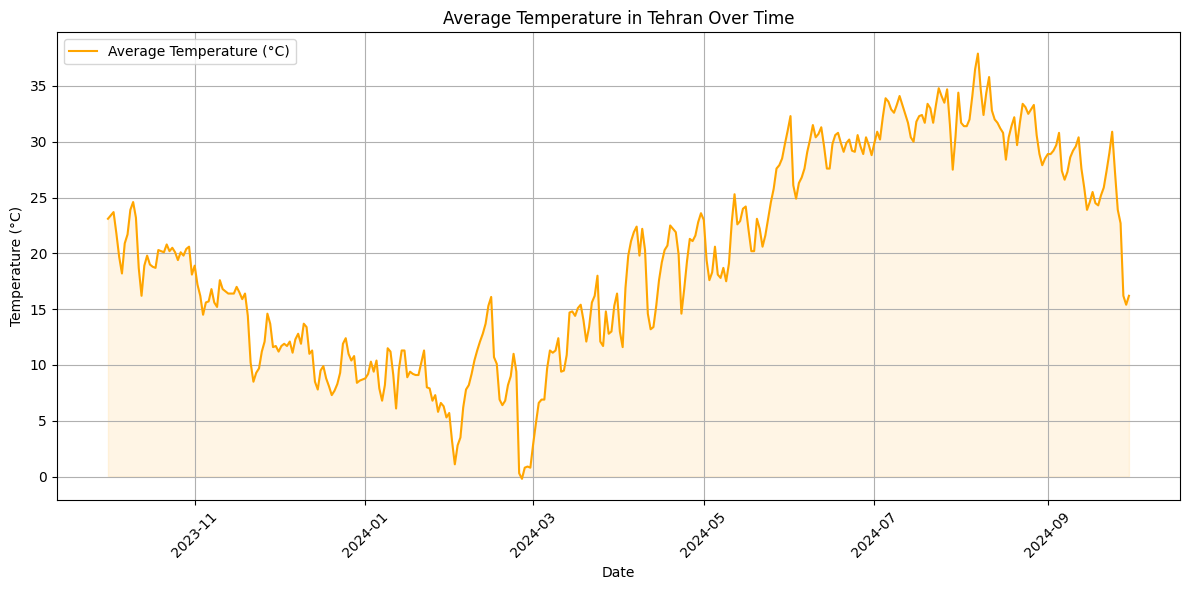

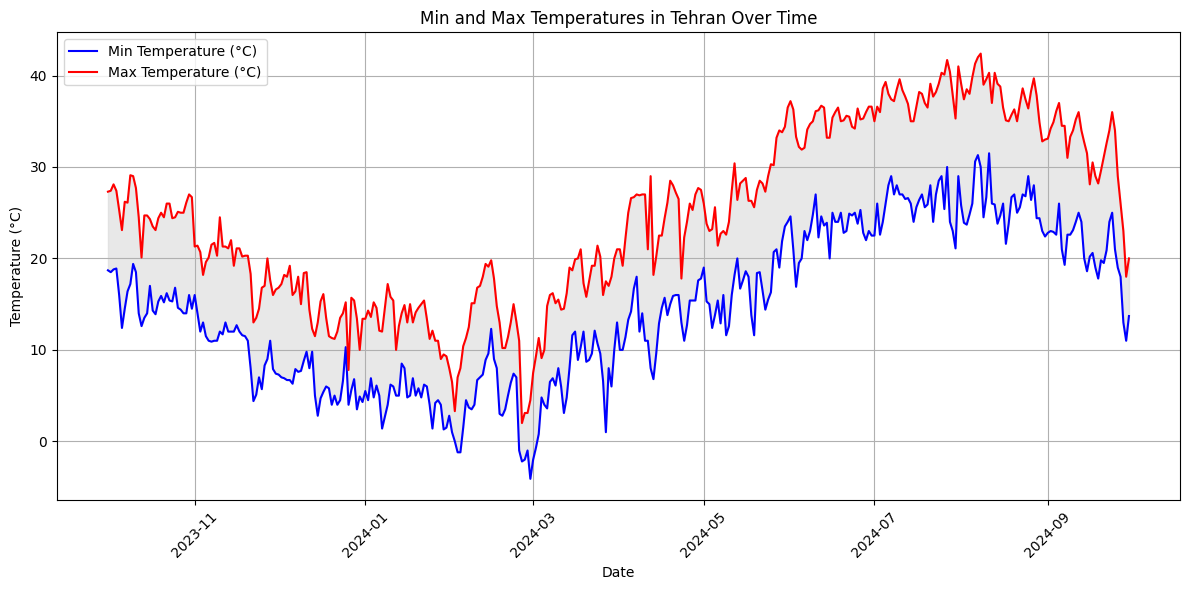

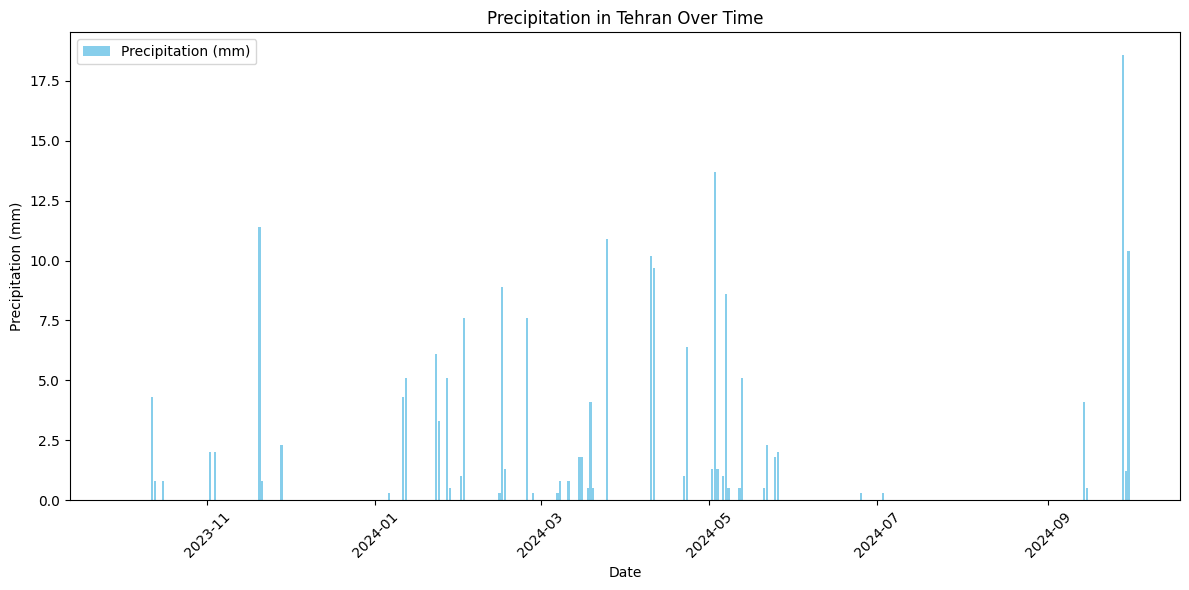

            tavg  tmin  tmax  prcp  snow  wdir  wspd  wpgt    pres  tsun
date                                                                    
2023-10-01  23.1  18.7  27.3   0.0   NaN    63   9.3   NaN  1013.6   NaN
2023-10-02  23.4  18.5  27.4   0.0   NaN   306  13.6   NaN  1013.1   NaN
2023-10-03  23.7  18.8  28.1   0.0   NaN   258  19.0   NaN  1014.8   NaN
2023-10-04  21.8  18.9  27.4   0.0   NaN   271  21.0   NaN  1017.6   NaN
2023-10-05  19.7  16.0  25.3   0.0   NaN   272  32.0   NaN  1017.9   NaN
2023-10-06  18.2  12.4  23.1   0.0   NaN   182  10.2   NaN  1020.5   NaN
2023-10-07  20.9  14.5  26.2   0.0   NaN   291   9.9   NaN  1017.9   NaN
2023-10-08  21.7  16.4  26.1   0.0   NaN   107   8.5   NaN  1018.4   NaN
2023-10-09  23.9  17.2  29.1   0.0   NaN   307   8.8   NaN  1015.9   NaN
2023-10-10  24.6  19.4  29.0   0.0   NaN   284  19.9   NaN  1016.1   NaN
2023-10-11  23.2  18.5  27.7   0.0   NaN   318  13.3   NaN  1016.8   NaN
2023-10-12  18.7  14.0  24.5   4.3   NaN   313  17.

In [10]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data from the Excel file
file_path = r'E:\CompAppTools\Project\TehranWeather.xlsx'
data = pd.read_excel(file_path)

# Display the first few rows and column names of the data to understand its structure
print(data.head())
print(data.columns)

# Convert 'date' column to datetime format
data['date'] = pd.to_datetime(data['date'])

# Set the date column as the index
data.set_index('date', inplace=True)

# Plot average temperature over time
plt.figure(figsize=(12, 6))
plt.plot(data.index, data['tavg'], label='Average Temperature (°C)', color='orange')
plt.fill_between(data.index, data['tavg'], color='orange', alpha=0.1)
plt.title('Average Temperature in Tehran Over Time')
plt.xlabel('Date')
plt.ylabel('Temperature (°C)')
plt.legend()
plt.grid()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Plot minimum and maximum temperatures
plt.figure(figsize=(12, 6))
plt.plot(data.index, data['tmin'], label='Min Temperature (°C)', color='blue')
plt.plot(data.index, data['tmax'], label='Max Temperature (°C)', color='red')
plt.fill_between(data.index, data['tmin'], data['tmax'], color='lightgray', alpha=0.5)
plt.title('Min and Max Temperatures in Tehran Over Time')
plt.xlabel('Date')
plt.ylabel('Temperature (°C)')
plt.legend()
plt.grid()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Plot precipitation over time
plt.figure(figsize=(12, 6))
plt.bar(data.index, data['prcp'], color='skyblue', label='Precipitation (mm)')
plt.title('Precipitation in Tehran Over Time')
plt.xlabel('Date')
plt.ylabel('Precipitation (mm)')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Set display options to show all rows and columns
pd.set_option('display.max_rows', None)  # Show all rows
pd.set_option('display.max_columns', None)  # Show all columns

# Print the whole dataset
print(data)


### **Data Processing and Outlier Detection in Tehran Weather Data**


#### **Data Inspection and Missing Values:**
I began by inspecting the structure of the dataset to understand its contents and identify any missing values. Upon inspection, I found that some columns, such as `snow`, `wpgt`, and `tsun`, have significant amounts of missing data. These columns were either ignored for further analysis or handled as appropriate based on the context of the analysis.

#### **Summary Statistics:**
I computed summary statistics for the key variables: `tavg`, `tmin`, `tmax`, and `prcp`. These statistics include the mean, standard deviation, minimum, maximum, and percentiles (25th, 50th, 75th). The summary statistics provide an overview of the data distribution and help me understand the typical range of values for each variable, which is useful when detecting outliers.

#### **Z-Score Outlier Detection:**
One method for detecting extreme values is the **z-score**, which indicates how many standard deviations a data point is from the mean. A z-score greater than 2 or less than -2 is typically considered an indication of an outlier. Using the `scipy.stats.zscore` function, I calculated the z-scores for the `tavg`, `tmin`, `tmax`, and `prcp` columns.

I then filtered the dataset to identify rows where the absolute value of any of the z-scores exceeded 2, which signified extreme values. These extreme values were flagged for further investigation, as they could represent unusual weather patterns or errors in the data.

#### **Interquartile Range (IQR) Outlier Detection:**
The **Interquartile Range (IQR)** method was also used to detect extreme values. The IQR measures the range between the 25th percentile (Q1) and the 75th percentile (Q3) of the data. Values outside the range of 1.5 times the IQR above Q3 or below Q1 are considered outliers.

I computed the IQR for the `tavg`, `tmin`, `tmax`, and `prcp` columns and identified rows where values exceeded the thresholds defined by the IQR rule. These outliers represent weather conditions that are either unusually high or low compared to the typical values for that variable.

#### **Extreme Values Identified:**
The outlier detection methods identified several extreme values across the dataset. These include unusually high or low temperatures and precipitation levels that may warrant further investigation. For instance, some dates displayed exceptionally high temperatures or sudden precipitation spikes, which could represent either rare weather events or potential data recording issues.

#### **Conclusion:**
The analysis of the Tehran weather dataset involved:
1. **Data inspection** to understand its structure and detect missing values.
2. **Calculation of summary statistics** to explore the distribution of key weather variables.
3. **Detection of extreme values** using two statistical methods: z-scores and the IQR method. Both methods identified outliers in temperature and precipitation data, which could be useful for further analysis, such as examining extreme weather events or validating the quality of the data.

These outliers can now be further analyzed to assess whether they represent genuine extreme weather events or data errors that should be corrected or removed. Additionally, this analysis lays the groundwork for more advanced time series forecasting or weather prediction tasks, where understanding and handling outliers is crucial for model performance.

         date  tavg  tmin  tmax  prcp  snow  wdir  wspd  wpgt    pres  tsun
0  2023-10-01  23.1  18.7  27.3   0.0   NaN    63   9.3   NaN  1013.6   NaN
1  2023-10-02  23.4  18.5  27.4   0.0   NaN   306  13.6   NaN  1013.1   NaN
2  2023-10-03  23.7  18.8  28.1   0.0   NaN   258  19.0   NaN  1014.8   NaN
3  2023-10-04  21.8  18.9  27.4   0.0   NaN   271  21.0   NaN  1017.6   NaN
4  2023-10-05  19.7  16.0  25.3   0.0   NaN   272  32.0   NaN  1017.9   NaN
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    366 non-null    object 
 1   tavg    366 non-null    float64
 2   tmin    366 non-null    float64
 3   tmax    366 non-null    float64
 4   prcp    366 non-null    float64
 5   snow    1 non-null      float64
 6   wdir    366 non-null    int64  
 7   wspd    366 non-null    float64
 8   wpgt    0 non-null      float64
 9   pres    366 non-null    flo

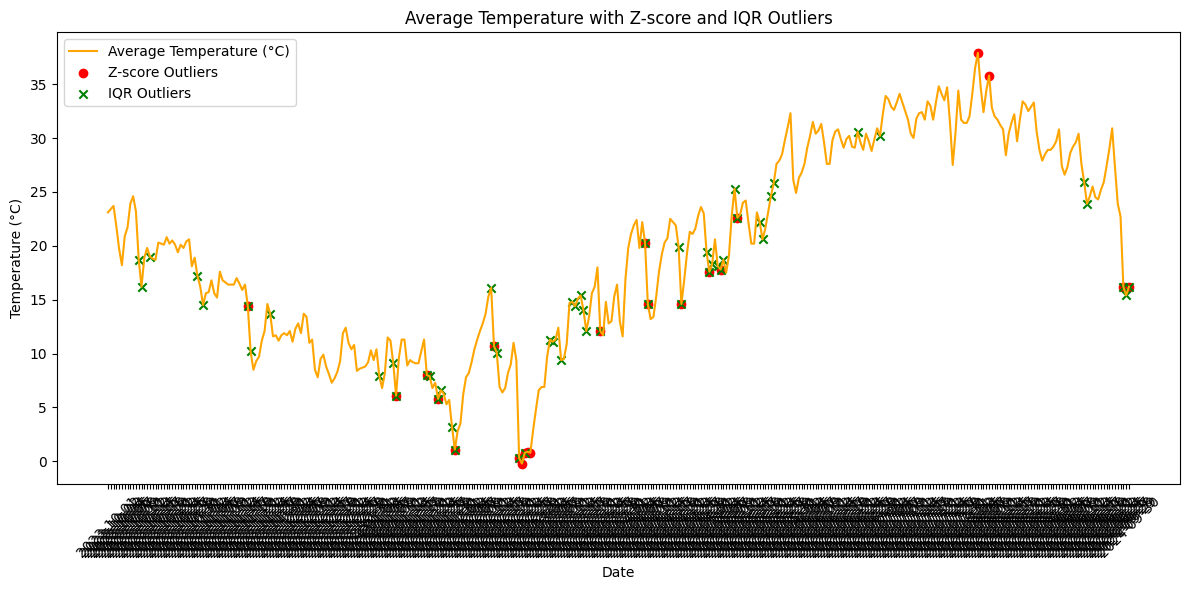

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import zscore

# Load the data from the Excel file
file_path = r'E:\CompAppTools\Project\TehranWeather.xlsx'
data = pd.read_excel(file_path)

# Display the first few rows and column names of the data to understand its structure
print(data.head())
print(data.info())
print(data.columns)

# Check for any missing values in the dataset
missing_values = data.isnull().sum()

# Drop rows with missing values for the columns of interest or impute them if needed
data_clean = data.dropna(subset=['tavg', 'tmin', 'tmax', 'prcp'])

# Calculate summary statistics for temperature and precipitation
summary_stats = data_clean[['tavg', 'tmin', 'tmax', 'prcp']].describe()
print(summary_stats)

# Compute z-scores for temperature and precipitation
data_clean[['tavg_z', 'tmin_z', 'tmax_z', 'prcp_z']] = data_clean[['tavg', 'tmin', 'tmax', 'prcp']].apply(zscore)

# Identify extreme values using z-score (e.g., values with |z| > 2 as extreme)
extreme_z_scores = data_clean[(data_clean['tavg_z'].abs() > 2) | 
                               (data_clean['tmin_z'].abs() > 2) | 
                               (data_clean['tmax_z'].abs() > 2) | 
                               (data_clean['prcp_z'].abs() > 2)]

# Calculate interquartile range (IQR) for temperature and precipitation
Q1 = data_clean[['tavg', 'tmin', 'tmax', 'prcp']].quantile(0.25)
Q3 = data_clean[['tavg', 'tmin', 'tmax', 'prcp']].quantile(0.75)
IQR = Q3 - Q1

# Define outliers as values beyond 1.5 * IQR from Q1 and Q3
extreme_iqr = data_clean[(data_clean['tavg'] < (Q1['tavg'] - 1.5 * IQR['tavg'])) | 
                          (data_clean['tavg'] > (Q3['tavg'] + 1.5 * IQR['tavg'])) |
                          (data_clean['tmin'] < (Q1['tmin'] - 1.5 * IQR['tmin'])) | 
                          (data_clean['tmin'] > (Q3['tmin'] + 1.5 * IQR['tmin'])) |
                          (data_clean['tmax'] < (Q1['tmax'] - 1.5 * IQR['tmax'])) | 
                          (data_clean['tmax'] > (Q3['tmax'] + 1.5 * IQR['tmax'])) |
                          (data_clean['prcp'] < (Q1['prcp'] - 1.5 * IQR['prcp'])) | 
                          (data_clean['prcp'] > (Q3['prcp'] + 1.5 * IQR['prcp']))]

# Display extreme values detected by z-score and IQR methods
print("Z-score Outliers:")
print(extreme_z_scores[['date', 'tavg', 'tmin', 'tmax', 'prcp']])

print("IQR Outliers:")
print(extreme_iqr[['date', 'tavg', 'tmin', 'tmax', 'prcp']])

# Visualization: Plot the extreme values detected by both methods
plt.figure(figsize=(12, 6))
plt.plot(data_clean['date'], data_clean['tavg'], label='Average Temperature (°C)', color='orange')
plt.scatter(extreme_z_scores['date'], extreme_z_scores['tavg'], color='red', label='Z-score Outliers', marker='o')
plt.scatter(extreme_iqr['date'], extreme_iqr['tavg'], color='green', label='IQR Outliers', marker='x')
plt.title('Average Temperature with Z-score and IQR Outliers')
plt.xlabel('Date')
plt.ylabel('Temperature (°C)')
plt.legend()
plt.xticks(rotation=45)
plt.grid(False)  # Remove gridlines
plt.tight_layout()
plt.show()


## **Temperature and precipitation in four seasons**
To divide the dataset into the four seasons (Winter, Spring, Summer, Fall), I will use the following general guidelines for seasonal divisions in Tehran:

- **Winter**: December 21 to March 20
- **Spring**: March 21 to June 20
- **Summer**: June 21 to September 20
- **Fall**: September 21 to December 20

I first segment the dataset into these four seasons and then compute the required statistics (minimum, maximum, mean, median, standard deviation) for both temperature (`tavg`) and precipitation (`prcp`). Finally, I create a table and a graph to visualize the statistics.

### Step-by-step breakdown:

1. **Extract seasonal data** based on date ranges.
2. **Calculate statistics** for `tavg` (average temperature) and `prcp` (precipitation) for each season.
3. **Create a table** showing these statistics.
4. **Plot a graph** to visualize the data across different seasons.

Let's start with the table creation and graph. Here's a Python code snippet to handle this task using `pandas` and `matplotlib`:



         date  tavg  tmin  tmax  prcp  snow  wdir  wspd  wpgt    pres  tsun
0  2023-10-01  23.1  18.7  27.3   0.0   NaN    63   9.3   NaN  1013.6   NaN
1  2023-10-02  23.4  18.5  27.4   0.0   NaN   306  13.6   NaN  1013.1   NaN
2  2023-10-03  23.7  18.8  28.1   0.0   NaN   258  19.0   NaN  1014.8   NaN
3  2023-10-04  21.8  18.9  27.4   0.0   NaN   271  21.0   NaN  1017.6   NaN
4  2023-10-05  19.7  16.0  25.3   0.0   NaN   272  32.0   NaN  1017.9   NaN
+----+----------+-----------------+-----------------+------------------+--------------------+-----------------+-------------------+-------------------+--------------------+----------------------+-------------------+
|    | Season   |   Min Temp (°C) |   Max Temp (°C) |   Mean Temp (°C) |   Median Temp (°C) |   Std Temp (°C) |   Min Precip (mm) |   Max Precip (mm) |   Mean Precip (mm) |   Median Precip (mm) |   Std Precip (mm) |
+====+==========+=================+=================+==================+====================+=================+=

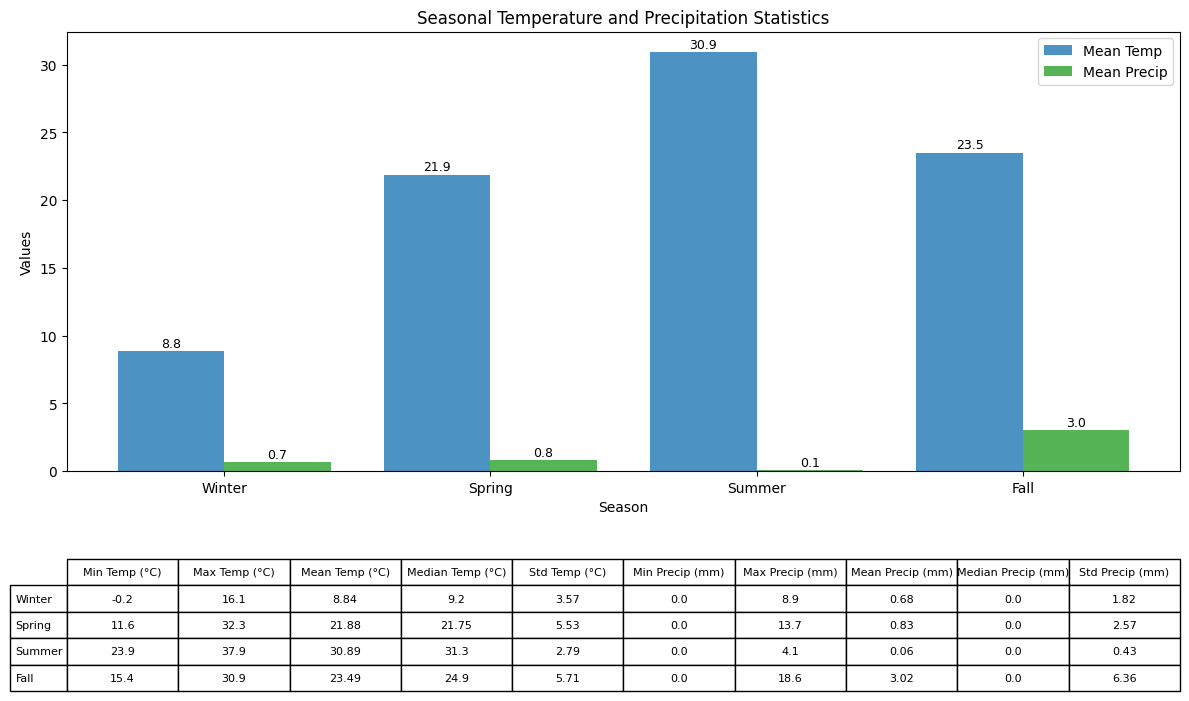

In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from tabulate import tabulate  # For pretty-printing tables

# Load the dataset
file_path = r'E:\CompAppTools\Project\TehranWeather.xlsx'
df = pd.read_excel(file_path)

# Check the first few rows of the data to confirm it has loaded correctly
print(df.head())

# Assuming 'date' column is in the format 'YYYY-MM-DD', convert it to datetime
df['date'] = pd.to_datetime(df['date'])

# Define seasonal date ranges
winter = (df['date'] >= '2023-12-21') & (df['date'] <= '2024-03-20')
spring = (df['date'] >= '2024-03-21') & (df['date'] <= '2024-06-20')
summer = (df['date'] >= '2024-06-21') & (df['date'] <= '2024-09-20')
fall = (df['date'] >= '2024-09-21') & (df['date'] <= '2024-12-20')

# Segment the dataset by seasons
seasons = {
    'Winter': df[winter],
    'Spring': df[spring],
    'Summer': df[summer],
    'Fall': df[fall]
}

# Initialize an empty list to store statistics
season_stats = []

# Calculate the statistics for each season
for season, data in seasons.items():
    temp_stats = {
        'Season': season,
        'Min Temp (°C)': data['tavg'].min(),
        'Max Temp (°C)': data['tavg'].max(),
        'Mean Temp (°C)': data['tavg'].mean(),
        'Median Temp (°C)': data['tavg'].median(),
        'Std Temp (°C)': data['tavg'].std(),
        'Min Precip (mm)': data['prcp'].min(),
        'Max Precip (mm)': data['prcp'].max(),
        'Mean Precip (mm)': data['prcp'].mean(),
        'Median Precip (mm)': data['prcp'].median(),
        'Std Precip (mm)': data['prcp'].std(),
    }
    season_stats.append(temp_stats)

# Convert to DataFrame for better display
season_stats_df = pd.DataFrame(season_stats)

# Print the statistics table in a formatted style
print(tabulate(season_stats_df, headers='keys', tablefmt='grid'))

# Plot the bar chart as before
x = np.arange(len(season_stats_df['Season']))  # the label locations
width = 0.4  # the width of the bars

fig, ax = plt.subplots(figsize=(12, 8))

# Plotting offset bars
temp_bars = ax.bar(x - width / 2, season_stats_df['Mean Temp (°C)'], width, label='Mean Temp', color='tab:blue', alpha=0.8)
precip_bars = ax.bar(x + width / 2, season_stats_df['Mean Precip (mm)'], width, label='Mean Precip', color='tab:green', alpha=0.8)

# Add labels, title, and legend
ax.set_xlabel('Season')
ax.set_ylabel('Values')
ax.set_title('Seasonal Temperature and Precipitation Statistics')
ax.set_xticks(x)
ax.set_xticklabels(season_stats_df['Season'])
ax.legend()

# Annotate bar values
for bar in temp_bars:
    ax.annotate(f'{bar.get_height():.1f}', xy=(bar.get_x() + bar.get_width() / 2, bar.get_height()),
                xytext=(0, 3), textcoords="offset points", ha='center', fontsize=9)
for bar in precip_bars:
    ax.annotate(f'{bar.get_height():.1f}', xy=(bar.get_x() + bar.get_width() / 2, bar.get_height()),
                xytext=(0, 3), textcoords="offset points", ha='center', fontsize=9)

# Adding a table to the figure
table_data = season_stats_df.set_index('Season').round(2)  # Format values to 2 decimal points
table = plt.table(cellText=table_data.values,
                  colLabels=table_data.columns,
                  rowLabels=table_data.index,
                  cellLoc='center',
                  loc='bottom',
                  bbox=[0, -0.5, 1, 0.3])  # Adjust bbox for positioning

table.auto_set_font_size(False)
table.set_fontsize(8)

fig.tight_layout()
plt.show()



The graph shows two sets of bars:

- **Blue bars** for the **mean temperature** across the four seasons.
- **Green bars** for the **mean precipitation** across the same seasons, plotted on a secondary y-axis.

The graph provides a visual comparison between temperature and precipitation trends for each season.

### Conclusion:
This analysis allows me to understand seasonal variations in Tehran's climate, highlighting patterns such as warmer temperatures in summer and cooler temperatures in winter. Precipitation is typically higher in certain seasons, particularly in spring and fall. The table and graph help visualize these trends and assist in making further inferences about seasonal weather conditions in Tehran.

## **Visualizing Temperature and Precipitation Trends**
In this analysis, I aimed to explore the temperature and precipitation trends over time using various time series plots. To achieve this, I utilized several visualization techniques to examine the data comprehensively. Below are the steps I followed, and the corresponding plots I created:

**Line Plot (Time Series Plot)**

To begin, I created a line plot to visualize the temperature and precipitation trends over time. This plot displays continuous data for both temperature and precipitation, where the x-axis represents the date, and the y-axis shows the values for temperature and precipitation. This plot effectively shows how both variables evolve over the entire period of the dataset.

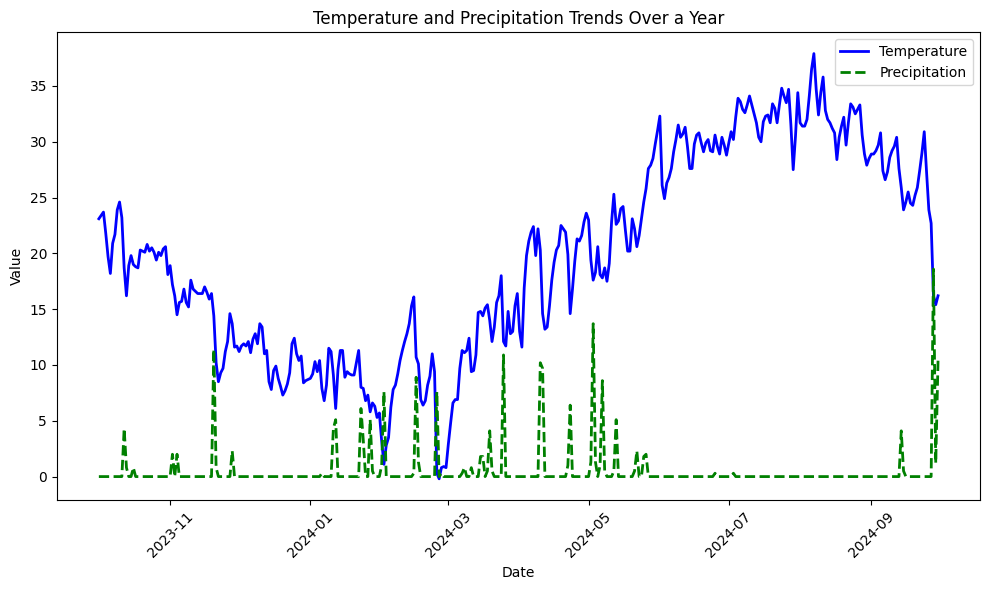

In [32]:
plt.figure(figsize=(10, 6))
plt.plot(df['date'], df['tavg'], label='Temperature', color='b', linestyle='-', linewidth=2)
plt.plot(df['date'], df['prcp'], label='Precipitation', color='g', linestyle='--', linewidth=2)
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Temperature and Precipitation Trends Over a Year')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**Seasonal Subset Plot**

Next, I split the data by seasons to better understand the variations across different times of the year. I plotted separate graphs for each season, highlighting the seasonal differences in temperature and precipitation. This helped me observe the patterns and trends specific to winter, spring, summer, and fall.

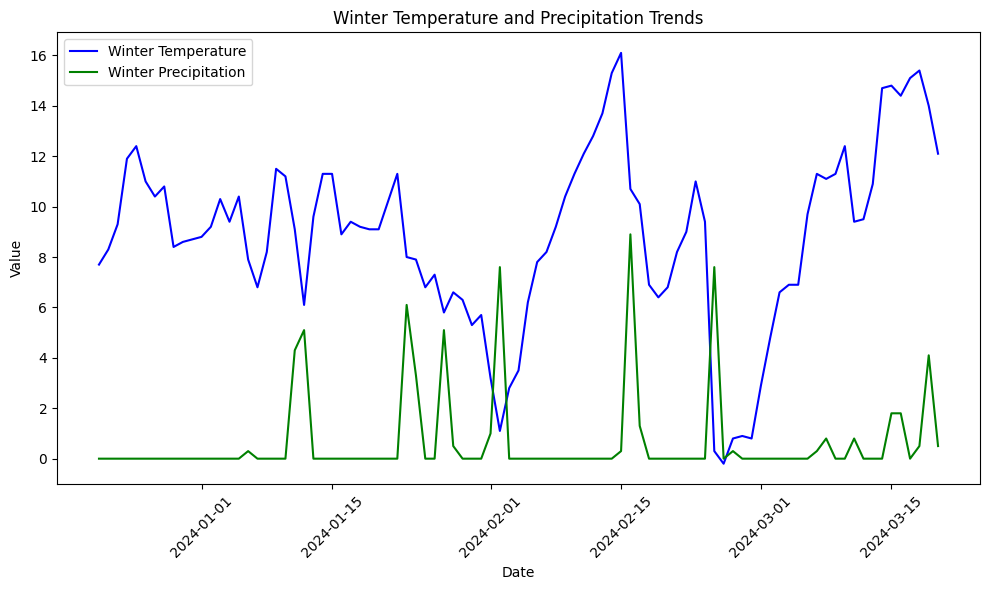

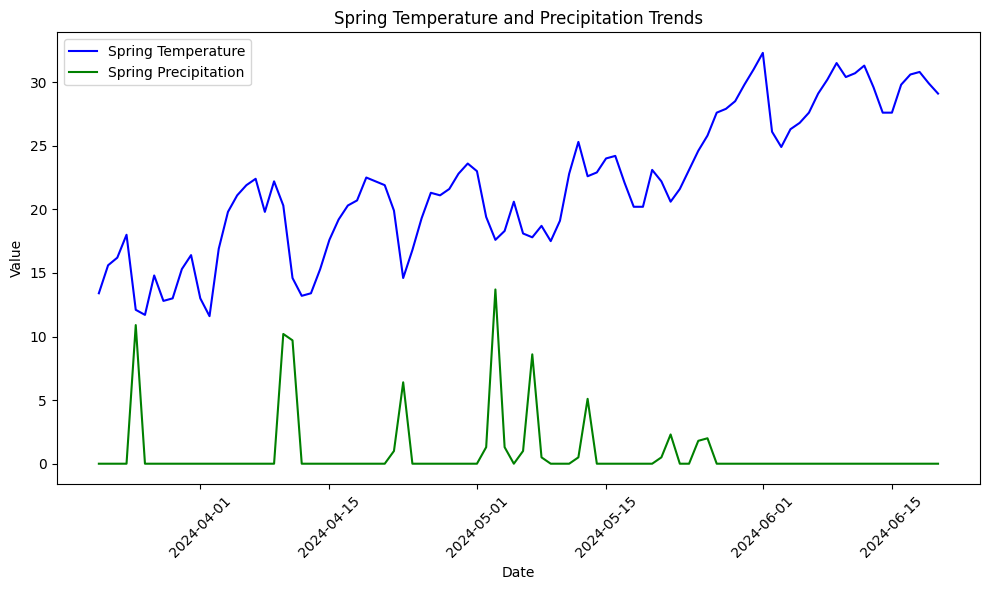

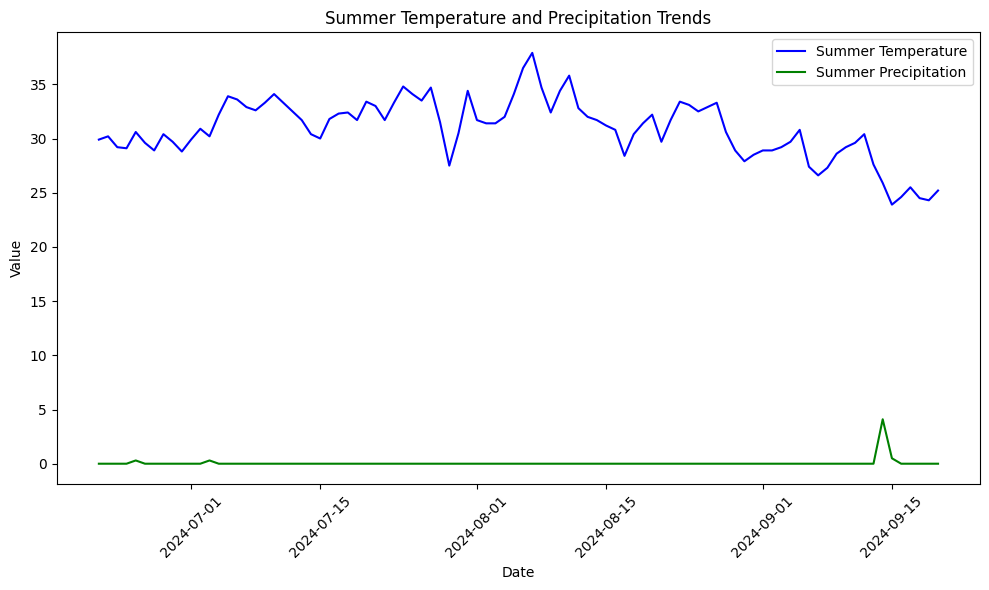

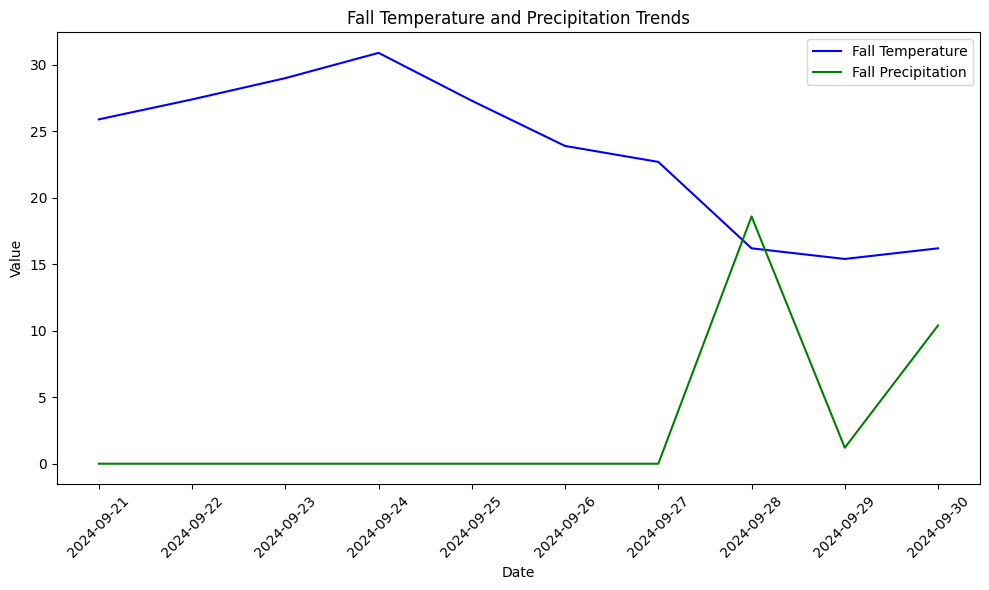

In [34]:
import matplotlib.pyplot as plt

# Define season names
season_names = ['Winter', 'Spring', 'Summer', 'Fall']

# Plot for each season independently
for season in season_names:
    plt.figure(figsize=(10, 6))
    plt.plot(seasons[season]['date'], seasons[season]['tavg'], label=f'{season} Temperature', color='b')
    plt.plot(seasons[season]['date'], seasons[season]['prcp'], label=f'{season} Precipitation', color='g')
    plt.title(f'{season} Temperature and Precipitation Trends')
    plt.xlabel('Date')
    plt.ylabel('Value')
    plt.legend()
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


**Box Plot**

To better understand the distribution of temperature and precipitation values within each season, I created a box plot. This plot shows the minimum, maximum, median, and quartiles of the temperature and precipitation data for each season. It also helps identify any outliers and compares the spread of values across the seasons.

C:\Users\bmehe\AppData\Local\Temp\ipykernel_19900\2088865926.py:17: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bp = plt.boxplot(seasons_data, labels=['Winter', 'Spring', 'Summer', 'Fall'], patch_artist=True,


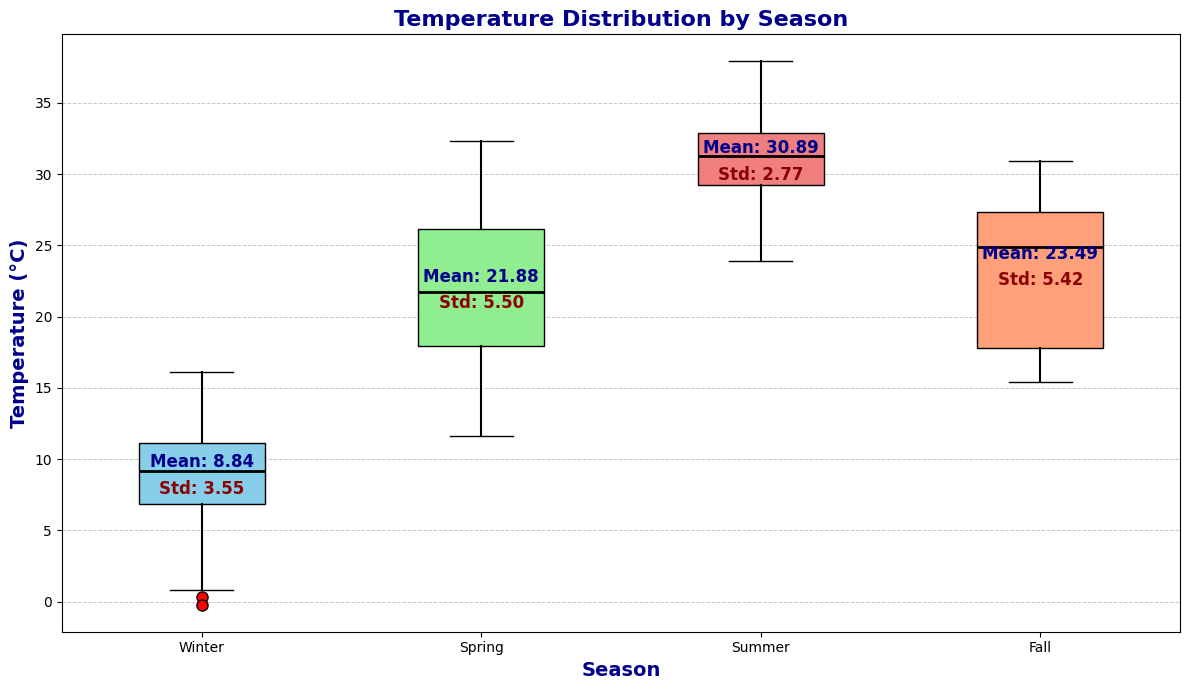

In [47]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming 'seasons' is already defined with the data for each season

# Prepare the data for each season
seasons_data = [seasons['Winter']['tavg'], seasons['Spring']['tavg'], seasons['Summer']['tavg'], seasons['Fall']['tavg']]

# Define colors for each season
box_colors = ['skyblue', 'lightgreen', 'lightcoral', 'lightsalmon']

# Create the boxplot with custom colors
plt.figure(figsize=(12, 7))
boxprops = dict(facecolor='lightgray', color='black')

# Create boxplot without assigning colors directly yet
bp = plt.boxplot(seasons_data, labels=['Winter', 'Spring', 'Summer', 'Fall'], patch_artist=True, 
                 boxprops=boxprops, whiskerprops=dict(color='black', linewidth=1.5),
                 flierprops=dict(markerfacecolor='red', marker='o', markersize=8, linestyle='none'),
                 medianprops=dict(color='black', linewidth=2))

# Assign colors to each boxplot artist
for patch, color in zip(bp['boxes'], box_colors):
    patch.set_facecolor(color)

# Calculate the mean and standard deviation for each season
means = [np.mean(season) for season in seasons_data]
std_devs = [np.std(season) for season in seasons_data]

# Add mean and standard deviation annotations to the plot
for i in range(len(means)):
    # Annotate the mean
    plt.text(i + 1, means[i] + 0.3, f'Mean: {means[i]:.2f}', ha='center', va='bottom', color='darkblue', fontsize=12, fontweight='bold')
    # Annotate the standard deviation
    plt.text(i + 1, means[i] - 0.3, f'Std: {std_devs[i]:.2f}', ha='center', va='top', color='darkred', fontsize=12, fontweight='bold')

# Add labels and title with improved style
plt.title('Temperature Distribution by Season', fontsize=16, fontweight='bold', color='darkblue')
plt.ylabel('Temperature (°C)', fontsize=14, fontweight='bold', color='darkblue')
plt.xlabel('Season', fontsize=14, fontweight='bold', color='darkblue')

# Add a grid to make the plot more readable
plt.grid(True, axis='y', linestyle='--', linewidth=0.7, alpha=0.7)

# Show the plot
plt.tight_layout()
plt.show()


**Heatmap of Monthly or Seasonal Averages**

I also created a heatmap to visualize the monthly or seasonal variations in temperature and precipitation. This plot displayed the average temperature and precipitation values for each month, with color coding to indicate the magnitude of values. It provided a clear and visually appealing way to see seasonal trends across the year.

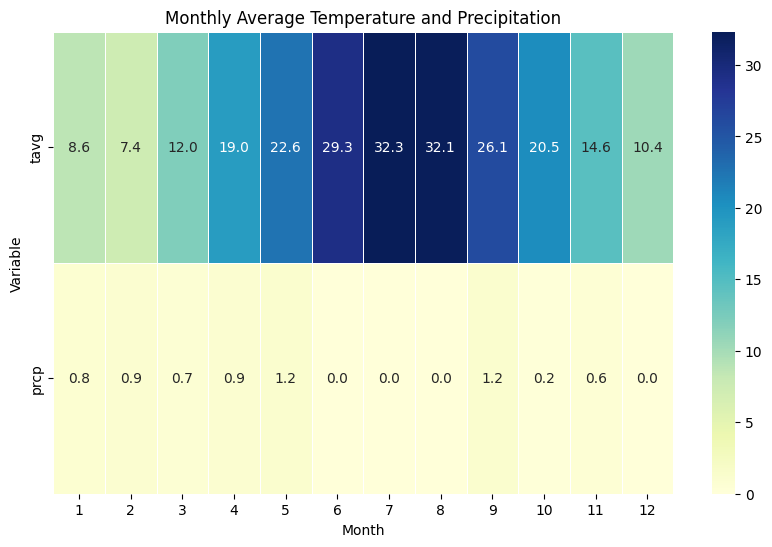

In [40]:
import seaborn as sns
monthly_avg = df.groupby(df['date'].dt.month)[['tavg', 'prcp']].mean()
plt.figure(figsize=(10, 6))
sns.heatmap(monthly_avg.T, cmap="YlGnBu", annot=True, fmt=".1f", linewidths=0.5)
plt.title('Monthly Average Temperature and Precipitation')
plt.xlabel('Month')
plt.ylabel('Variable')
plt.show()


Conclusion

Through these visualizations, I was able to effectively analyze the temperature and precipitation trends across different seasons, uncover relationships between the two variables, and observe long-term trends by applying smoothing techniques. The various plot types I used, including line plots, box plots, heatmaps provided valuable insights into the data's behavior over time, allowing for a thorough understanding of seasonal patterns and relationships between temperature and precipitation.

 Extreme Weather Events
 
 To investigate extreme weather events, I defined thresholds for temperature and precipitation. Specifically, I used the 90th percentile of the daily average temperature (tavg) to define hot extremes and the 10th percentile for cold extremes. For precipitation, I set a threshold of 50 mm to identify heavy rainfall events. Next, I created flags in the dataset to indicate when each day met the criteria for extreme temperature (high or low) or heavy precipitation. I then grouped the data by month and calculated the total count of extreme events for each month. Finally, I visualized these trends by plotting a stacked bar chart, showing the frequency of extreme weather events (high temperature, low temperature, and heavy precipitation) for each month. This visualization helps to identify seasonal patterns and trends in extreme weather events over time.

<Figure size 1200x700 with 0 Axes>

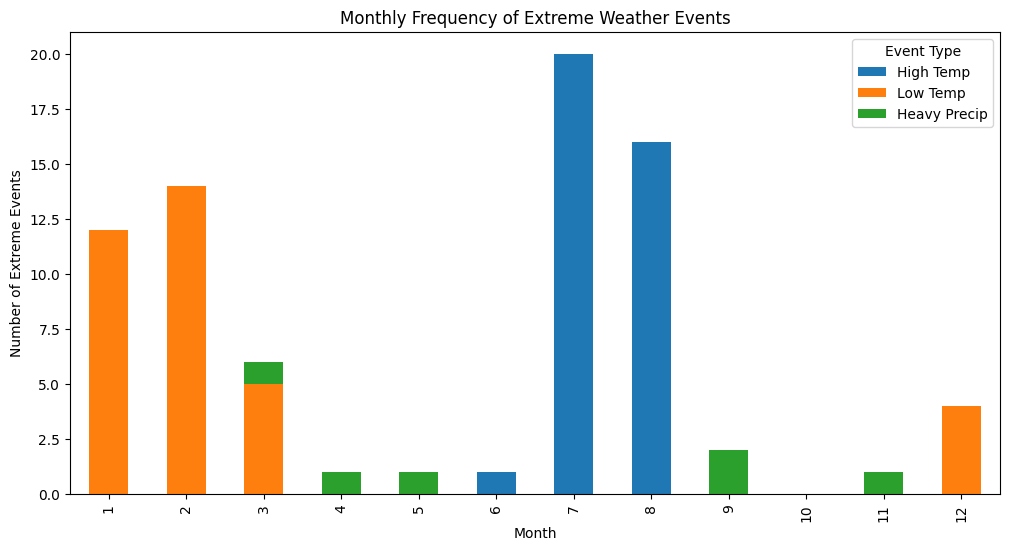

In [36]:
# Define temperature and precipitation extremes
temp_high_threshold = df['tavg'].quantile(0.9)  # 90th percentile for hot extremes
temp_low_threshold = df['tavg'].quantile(0.1)   # 10th percentile for cold extremes
precip_high_threshold = 10  # 10 mm for heavy rainfall events

# Create flags for extreme events
df['extreme_temp_high'] = df['tavg'] > temp_high_threshold
df['extreme_temp_low'] = df['tavg'] < temp_low_threshold
df['extreme_precip'] = df['prcp'] > precip_high_threshold

# Count extreme events per month or season
monthly_extremes = df.groupby(df['date'].dt.month)[['extreme_temp_high', 'extreme_temp_low', 'extreme_precip']].sum()

# Plot the trends in extreme events
plt.figure(figsize=(12, 7))
monthly_extremes.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title('Monthly Frequency of Extreme Weather Events')
plt.ylabel('Number of Extreme Events')
plt.xlabel('Month')
plt.legend(title="Event Type", labels=["High Temp", "Low Temp", "Heavy Precip"])
plt.show()


date                   0
tavg                   0
tmin                   0
tmax                   0
prcp                   0
snow                 365
wdir                   0
wspd                   0
wpgt                 366
pres                   0
tsun                 366
rolling_temp          29
rolling_prcp          29
extreme_temp_high      0
extreme_temp_low       0
extreme_precip         0
dtype: int64


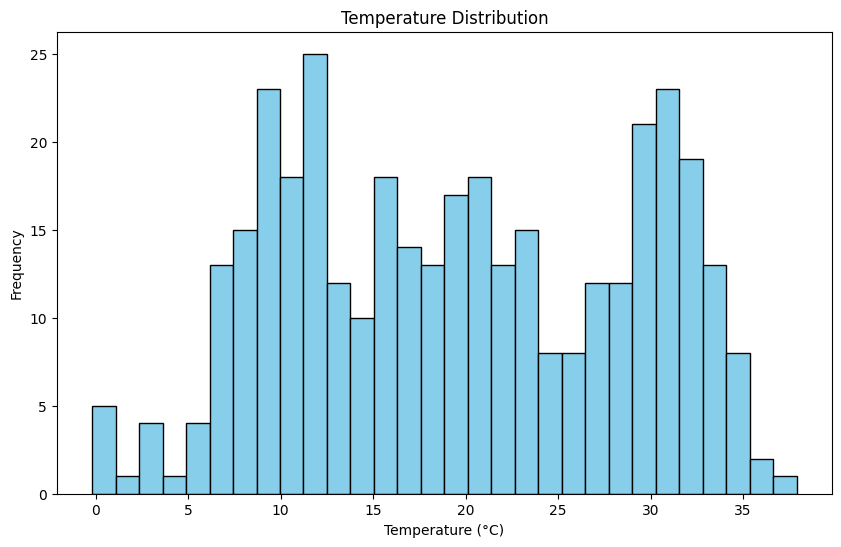

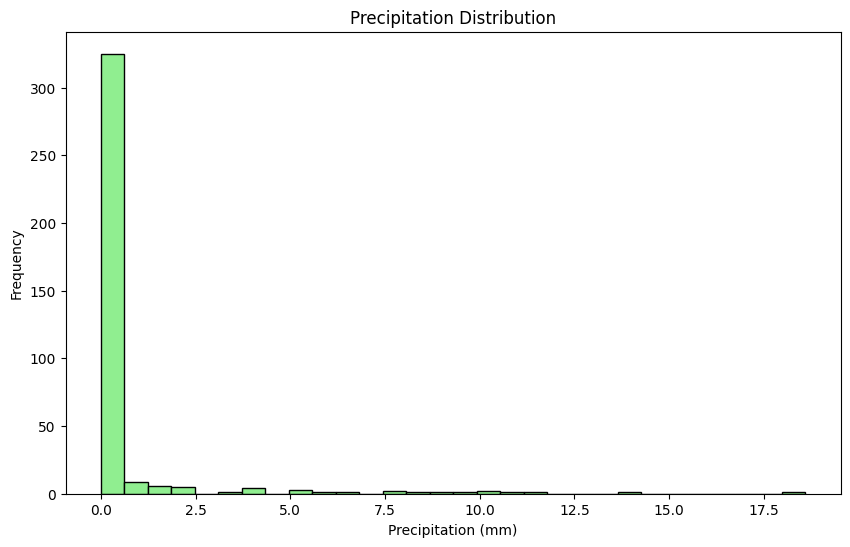

In [57]:
# Check for missing data
print(df.isnull().sum())

# Drop rows with missing temperature or precipitation data
df_cleaned = df.dropna(subset=['tavg', 'prcp'])

# Re-run the extreme event identification
import matplotlib.pyplot as plt

# Plot the temperature distribution
plt.figure(figsize=(10, 6))
plt.hist(df['tavg'], bins=30, color='skyblue', edgecolor='black')
plt.title('Temperature Distribution')
plt.xlabel('Temperature (°C)')
plt.ylabel('Frequency')
plt.show()

# Plot the precipitation distribution
plt.figure(figsize=(10, 6))
plt.hist(df['prcp'], bins=30, color='lightgreen', edgecolor='black')
plt.title('Precipitation Distribution')
plt.xlabel('Precipitation (mm)')
plt.ylabel('Frequency')
plt.show()

